In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
df_HousingPrice = pd.read_csv('Data_BatDongSan.csv' , encoding = 'utf-8')
df_HousingPrice = df_HousingPrice.drop('Title' , axis = 1)
df_HousingPrice

,Area,Price,Bedrooms,Bathrooms,Address
0,121 m²,8.1 tỷ,3,2.0,"Bình Thạnh, Hồ Chí Minh"
1,53 m²,1.95 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"
2,53 m²,1.7 tỷ,1,1.0,"Quận 7, Hồ Chí Minh"
3,70 m²,2.3 tỷ,3,2.0,"Hà Đông, Hà Nội"
4,67 m²,2.4 tỷ,2,2.0,"Quận 7, Hồ Chí Minh"
...,...,...,...,...,...
19774,80 m²,4.5 tỷ,2,0.0,"Quận 2, Hồ Chí Minh"
19775,97 m²,3.3 tỷ,2,2.0,"Quận 6, Hồ Chí Minh"
19776,117 m²,8.3 tỷ,3,2.0,"Bình Thạnh, Hồ Chí Minh"
19777,534 m²,49.9 tỷ,4,2.0,"Quận 7, Hồ Chí Minh"


In [3]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       19779 non-null  object 
 1   Price      19779 non-null  object 
 2   Bedrooms   19779 non-null  int64  
 3   Bathrooms  19739 non-null  float64
 4   Address    19779 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 772.7+ KB


# Clean data

In [4]:
df_HousingPrice['Address']

0        Bình Thạnh, Hồ Chí Minh
1            Quận 7, Hồ Chí Minh
2            Quận 7, Hồ Chí Minh
3                Hà Đông, Hà Nội
4            Quận 7, Hồ Chí Minh
                  ...           
19774        Quận 2, Hồ Chí Minh
19775        Quận 6, Hồ Chí Minh
19776    Bình Thạnh, Hồ Chí Minh
19777        Quận 7, Hồ Chí Minh
19778        Quận 8, Hồ Chí Minh
Name: Address, Length: 19779, dtype: object

In [5]:
str_a = "·\nQuận 4, Hồ Chí Minh"
result = str_a.replace("·\n", "")
print(result)

Quận 4, Hồ Chí Minh


In [6]:
def clean_address(item):
    if('\n' in item):
        result = str_a.replace("·\n", "")
        return result
    return item

In [7]:
df_HousingPrice['Address'] = df_HousingPrice['Address'].apply(clean_address)
df_HousingPrice['Address'].value_counts()

Nam Từ Liêm, Hà Nội                  1878
Quận 7, Hồ Chí Minh                  1393
Quận 2, Hồ Chí Minh                  1339
Cầu Giấy, Hà Nội                     1133
Hà Đông, Hà Nội                      1052
                                     ... 
Bắc Giang, Bắc Giang                    1
Bất động sản Úc,                        1
Bến Tre, Bến Tre                        1
Rạch Giá, Kiên Giang                    1
Phan Rang - Tháp Chàm, Ninh Thuận       1
Name: Address, Length: 95, dtype: int64

In [8]:
def get_price(price):
    if "triệu" in price:
        temp = price.split(' ')
        return float(temp[0]) / 1000
    elif "tỷ" in price:
        temp = price.split(' ')
        return float(temp[0])
    elif "Giá" in price:
        return np.NaN

In [9]:
df_HousingPrice["Price"] = df_HousingPrice["Price"].apply(get_price)

In [10]:
df_HousingPrice.tail(20)

,Area,Price,Bedrooms,Bathrooms,Address
19759,74 m²,3.800,2,2.0,"Tân Bình, Hồ Chí Minh"
19760,54 m²,1.500,2,2.0,"Hoàng Mai, Hà Nội"
19761,185 m²,7.500,4,4.0,"Nam Từ Liêm, Hà Nội"
19762,78 m²,2.300,3,2.0,"Hà Đông, Hà Nội"
19763,92 m²,3.675,3,2.0,"Quận 9, Hồ Chí Minh"
19764,53 m²,NaN,2,1.0,"Hà Đông, Hà Nội"
19765,59 m²,2.050,2,2.0,"Bình Chánh, Hồ Chí Minh"
19766,51 m²,NaN,2,1.0,"Hà Đông, Hà Nội"
19767,106.85 m²,3.800,3,3.0,"Văn Giang, Hưng Yên"
19768,130 m²,3.300,2,1.0,"Hà Đông, Hà Nội"


In [11]:
df_HousingPrice.head(20)

,Area,Price,Bedrooms,Bathrooms,Address
0,121 m²,8.100,3,2.0,"Bình Thạnh, Hồ Chí Minh"
1,53 m²,1.950,1,1.0,"Quận 7, Hồ Chí Minh"
2,53 m²,1.700,1,1.0,"Quận 7, Hồ Chí Minh"
3,70 m²,2.300,3,2.0,"Hà Đông, Hà Nội"
4,67 m²,2.400,2,2.0,"Quận 7, Hồ Chí Minh"
5,83 m²,4.100,2,2.0,"Bình Thạnh, Hồ Chí Minh"
6,66.66 m²,2.453,2,2.0,"Quận 7, Hồ Chí Minh"
7,73 m²,NaN,2,2.0,"Quận 7, Hồ Chí Minh"
8,66 m²,3.440,2,2.0,"Quận 7, Hồ Chí Minh"
9,50 m²,1.800,1,1.0,"Quận 7, Hồ Chí Minh"


In [12]:
df_HousingPrice["Area"].value_counts()

70 m²       786
75 m²       558
80 m²       490
68 m²       487
65 m²       410
           ... 
90.77 m²      1
77.75 m²      1
71.45 m²      1
561 m²        1
534 m²        1
Name: Area, Length: 1172, dtype: int64

In [13]:
def get_Acreage(acreage):
    val = acreage.split(" ")
    return float(val[0])

In [14]:
df_HousingPrice["Area"] = df_HousingPrice["Area"].apply(get_Acreage)

In [15]:
df_HousingPrice.tail(20)

,Area,Price,Bedrooms,Bathrooms,Address
19759,74.00,3.800,2,2.0,"Tân Bình, Hồ Chí Minh"
19760,54.00,1.500,2,2.0,"Hoàng Mai, Hà Nội"
19761,185.00,7.500,4,4.0,"Nam Từ Liêm, Hà Nội"
19762,78.00,2.300,3,2.0,"Hà Đông, Hà Nội"
19763,92.00,3.675,3,2.0,"Quận 9, Hồ Chí Minh"
19764,53.00,NaN,2,1.0,"Hà Đông, Hà Nội"
19765,59.00,2.050,2,2.0,"Bình Chánh, Hồ Chí Minh"
19766,51.00,NaN,2,1.0,"Hà Đông, Hà Nội"
19767,106.85,3.800,3,3.0,"Văn Giang, Hưng Yên"
19768,130.00,3.300,2,1.0,"Hà Đông, Hà Nội"


In [16]:
print(df_HousingPrice["Bathrooms"].value_counts()[0])

2327


In [17]:
df_HousingPrice["Bathrooms"] = df_HousingPrice["Bathrooms"].replace(0 , np.NaN)

In [18]:
df_HousingPrice.tail(20)

,Area,Price,Bedrooms,Bathrooms,Address
19759,74.00,3.800,2,2.0,"Tân Bình, Hồ Chí Minh"
19760,54.00,1.500,2,2.0,"Hoàng Mai, Hà Nội"
19761,185.00,7.500,4,4.0,"Nam Từ Liêm, Hà Nội"
19762,78.00,2.300,3,2.0,"Hà Đông, Hà Nội"
19763,92.00,3.675,3,2.0,"Quận 9, Hồ Chí Minh"
19764,53.00,NaN,2,1.0,"Hà Đông, Hà Nội"
19765,59.00,2.050,2,2.0,"Bình Chánh, Hồ Chí Minh"
19766,51.00,NaN,2,1.0,"Hà Đông, Hà Nội"
19767,106.85,3.800,3,3.0,"Văn Giang, Hưng Yên"
19768,130.00,3.300,2,1.0,"Hà Đông, Hà Nội"


In [19]:
def get_District(address):
    val = address.split(",")
    return val[0]

In [20]:
df_HousingPrice["District"] = df_HousingPrice["Address"].apply(get_District)

In [21]:
df_HousingPrice.head()

,Area,Price,Bedrooms,Bathrooms,Address,District
0,121.0,8.10,3,2.0,"Bình Thạnh, Hồ Chí Minh",Bình Thạnh
1,53.0,1.95,1,1.0,"Quận 7, Hồ Chí Minh",Quận 7
2,53.0,1.70,1,1.0,"Quận 7, Hồ Chí Minh",Quận 7
3,70.0,2.30,3,2.0,"Hà Đông, Hà Nội",Hà Đông
4,67.0,2.40,2,2.0,"Quận 7, Hồ Chí Minh",Quận 7


In [22]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19779 entries, 0 to 19778
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       19779 non-null  float64
 1   Price      17788 non-null  float64
 2   Bedrooms   19779 non-null  int64  
 3   Bathrooms  17412 non-null  float64
 4   Address    19779 non-null  object 
 5   District   19779 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 927.3+ KB


In [23]:
def get_City(address):
    val = address.split(",")
    if val[1] != "":
        return val[1]
    return ""

In [24]:
df_HousingPrice["City"] = df_HousingPrice["Address"].apply(get_City)

In [25]:
df_HousingPrice["City"].value_counts()

 Hà Nội             9472
 Hồ Chí Minh        8013
 Bình Dương          792
 Hưng Yên            281
 Đà Nẵng             257
 Bà Rịa Vũng Tàu     255
 Khánh Hòa           208
 Hải Phòng           121
 Quảng Ninh          104
 Bình Định            55
 Bắc Ninh             54
 Đồng Nai             53
 Kiên Giang           21
 Thanh Hóa            20
 Nghệ An              16
 Bắc Giang             9
 Long An               7
 Thái Nguyên           7
 Bình Thuận            5
 Vĩnh Phúc             5
 Tây Ninh              5
 Lâm Đồng              5
 Hải Dương             5
 Thái Bình             3
                       1
 Bến Tre               1
 Cần Thơ               1
 Hà Tĩnh               1
 Thừa Thiên Huế        1
 Ninh Thuận            1
Name: City, dtype: int64

In [26]:
df_HousingPrice = df_HousingPrice.drop(df_HousingPrice[df_HousingPrice["City"] == ""].index)

In [27]:
df_HousingPrice["City"].value_counts()

 Hà Nội             9472
 Hồ Chí Minh        8013
 Bình Dương          792
 Hưng Yên            281
 Đà Nẵng             257
 Bà Rịa Vũng Tàu     255
 Khánh Hòa           208
 Hải Phòng           121
 Quảng Ninh          104
 Bình Định            55
 Bắc Ninh             54
 Đồng Nai             53
 Kiên Giang           21
 Thanh Hóa            20
 Nghệ An              16
 Bắc Giang             9
 Long An               7
 Thái Nguyên           7
 Bình Thuận            5
 Vĩnh Phúc             5
 Tây Ninh              5
 Lâm Đồng              5
 Hải Dương             5
 Thái Bình             3
 Bến Tre               1
 Cần Thơ               1
 Hà Tĩnh               1
 Thừa Thiên Huế        1
 Ninh Thuận            1
Name: City, dtype: int64

# Fill data NAN

In [28]:
df_HousingPrice = df_HousingPrice.drop("Address",axis=1)
df_HousingPrice.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
0,121.00,8.100,3,2.0,Bình Thạnh,Hồ Chí Minh
1,53.00,1.950,1,1.0,Quận 7,Hồ Chí Minh
2,53.00,1.700,1,1.0,Quận 7,Hồ Chí Minh
3,70.00,2.300,3,2.0,Hà Đông,Hà Nội
4,67.00,2.400,2,2.0,Quận 7,Hồ Chí Minh
5,83.00,4.100,2,2.0,Bình Thạnh,Hồ Chí Minh
6,66.66,2.453,2,2.0,Quận 7,Hồ Chí Minh
7,73.00,NaN,2,2.0,Quận 7,Hồ Chí Minh
8,66.00,3.440,2,2.0,Quận 7,Hồ Chí Minh
9,50.00,1.800,1,1.0,Quận 7,Hồ Chí Minh


In [29]:
df_HousingPrice["Price"] = df_HousingPrice["Price"].astype(float)

In [30]:
arr_price = np.array(df_HousingPrice["Price"])
np_price = arr_price[~np.isnan(arr_price)]
np_price

array([ 8.1 ,  1.95,  1.7 , ...,  8.3 , 49.9 ,  1.71])

# Box Plot Price

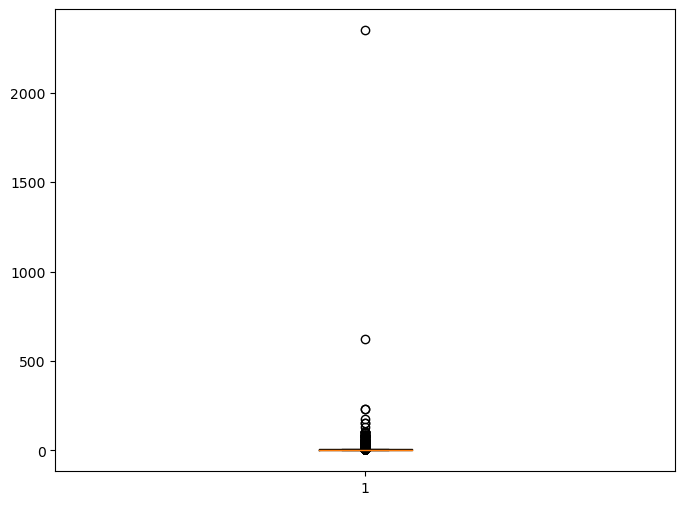

In [31]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(np_price)
plt.show();

In [32]:
val_rep = df_HousingPrice["Price"].median()
df_HousingPrice["Price"] = df_HousingPrice["Price"].fillna(val_rep)

In [33]:
df_HousingPrice.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
0,121.00,8.100,3,2.0,Bình Thạnh,Hồ Chí Minh
1,53.00,1.950,1,1.0,Quận 7,Hồ Chí Minh
2,53.00,1.700,1,1.0,Quận 7,Hồ Chí Minh
3,70.00,2.300,3,2.0,Hà Đông,Hà Nội
4,67.00,2.400,2,2.0,Quận 7,Hồ Chí Minh
5,83.00,4.100,2,2.0,Bình Thạnh,Hồ Chí Minh
6,66.66,2.453,2,2.0,Quận 7,Hồ Chí Minh
7,73.00,3.120,2,2.0,Quận 7,Hồ Chí Minh
8,66.00,3.440,2,2.0,Quận 7,Hồ Chí Minh
9,50.00,1.800,1,1.0,Quận 7,Hồ Chí Minh


# Bathrooms

In [34]:
print(df_HousingPrice["Bathrooms"].value_counts())

2.0     13013
1.0      3222
3.0       918
4.0       207
5.0        36
6.0        10
7.0         2
29.0        1
10.0        1
8.0         1
Name: Bathrooms, dtype: int64


In [35]:
df_HousingPrice["Bathrooms"] = df_HousingPrice["Bathrooms"].fillna(df_HousingPrice["Bathrooms"].median())

In [36]:
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19778 entries, 0 to 19778
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       19778 non-null  float64
 1   Price      19778 non-null  float64
 2   Bedrooms   19778 non-null  int64  
 3   Bathrooms  19778 non-null  float64
 4   District   19778 non-null  object 
 5   City       19778 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


# Data Visualization   

In [37]:
df_HousingPrice["City"] = df_HousingPrice["City"].apply(lambda x:x.strip())

In [38]:
Hn_house = df_HousingPrice[df_HousingPrice["City"] == "Hà Nội"]
Hn_house.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
3,70.0,2.30,3,2.0,Hà Đông,Hà Nội
12,116.0,5.40,4,2.0,Nam Từ Liêm,Hà Nội
14,109.0,3.12,3,1.0,Cầu Giấy,Hà Nội
15,78.0,1.70,2,2.0,Hà Đông,Hà Nội
18,108.0,3.70,3,2.0,Hai Bà Trưng,Hà Nội
91,118.0,3.30,3,1.0,Nam Từ Liêm,Hà Nội
93,79.0,3.40,3,2.0,Nam Từ Liêm,Hà Nội
94,100.0,3.90,3,2.0,Tây Hồ,Hà Nội
100,48.0,1.10,2,1.0,Thanh Xuân,Hà Nội
101,74.0,3.00,2,2.0,Bắc Từ Liêm,Hà Nội


In [39]:
arr_price_HN = Hn_house["Price"].to_numpy()
arr_price_HN

array([2.3 , 5.4 , 3.12, ..., 2.1 , 3.12, 4.3 ])

In [40]:
arr_HN = Hn_house["City"].values.tolist()
arr_HN

['Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',
 'Hà Nội',

In [41]:
TPHCM_House = df_HousingPrice[df_HousingPrice["City"] == "Hồ Chí Minh"]
TPHCM_House.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
0,121.00,8.100,3,2.0,Bình Thạnh,Hồ Chí Minh
1,53.00,1.950,1,1.0,Quận 7,Hồ Chí Minh
2,53.00,1.700,1,1.0,Quận 7,Hồ Chí Minh
4,67.00,2.400,2,2.0,Quận 7,Hồ Chí Minh
5,83.00,4.100,2,2.0,Bình Thạnh,Hồ Chí Minh
6,66.66,2.453,2,2.0,Quận 7,Hồ Chí Minh
7,73.00,3.120,2,2.0,Quận 7,Hồ Chí Minh
8,66.00,3.440,2,2.0,Quận 7,Hồ Chí Minh
9,50.00,1.800,1,1.0,Quận 7,Hồ Chí Minh
10,53.00,1.800,1,2.0,Quận 7,Hồ Chí Minh


In [42]:
arr_price_TPHCM = TPHCM_House["Price"].to_numpy()
arr_price_TPHCM

array([ 8.1 ,  1.95,  1.7 , ...,  8.3 , 49.9 ,  1.71])

In [43]:
arr_TPHCM = TPHCM_House["City"].values.tolist()
arr_TPHCM

['Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí Minh',
 'Hồ Chí

In [44]:
BinhDuong_House = df_HousingPrice[df_HousingPrice["City"] == "Bình Dương"]
BinhDuong_House.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
17,75.00,2.390,2,2.0,Dĩ An,Bình Dương
89,76.00,2.380,2,2.0,Dĩ An,Bình Dương
96,79.90,2.000,2,2.0,Thủ Dầu Một,Bình Dương
97,40.00,0.135,1,2.0,Dĩ An,Bình Dương
166,63.00,1.800,2,1.0,Dĩ An,Bình Dương
168,76.00,2.430,2,2.0,Dĩ An,Bình Dương
188,71.00,2.100,2,2.0,Dĩ An,Bình Dương
218,80.00,2.050,3,2.0,Thuận An,Bình Dương
280,75.00,2.400,2,2.0,Dĩ An,Bình Dương
304,75.00,2.100,2,2.0,Thuận An,Bình Dương


In [45]:
arr_price_BD = BinhDuong_House["Price"].to_numpy()
arr_price_BD

array([ 2.39 ,  2.38 ,  2.   ,  0.135,  1.8  ,  2.43 ,  2.1  ,  2.05 ,
        2.4  ,  2.1  ,  2.   ,  3.1  ,  1.99 ,  2.85 ,  1.75 ,  1.8  ,
        1.53 ,  1.85 ,  2.   ,  1.399,  3.12 ,  1.8  ,  1.5  ,  3.12 ,
        1.595,  1.22 ,  3.12 ,  2.2  ,  2.4  ,  2.   ,  3.12 ,  1.9  ,
        3.2  ,  1.285,  2.7  ,  2.4  ,  2.4  ,  2.82 ,  2.83 ,  1.89 ,
        1.26 ,  1.85 ,  3.12 ,  3.12 ,  1.55 ,  2.27 ,  1.3  ,  1.49 ,
        1.58 ,  1.8  ,  1.8  ,  1.62 ,  2.1  ,  0.79 ,  0.99 ,  3.12 ,
        3.12 ,  3.12 ,  3.12 ,  1.2  ,  3.6  ,  2.25 ,  1.275,  1.09 ,
        0.92 ,  2.5  ,  2.05 ,  2.738,  2.33 ,  2.842,  2.2  ,  3.12 ,
        1.9  ,  1.4  ,  2.04 ,  1.3  ,  3.5  ,  2.88 ,  1.58 ,  1.55 ,
        2.3  ,  2.1  ,  3.4  ,  1.35 ,  1.5  ,  2.7  ,  2.04 ,  2.6  ,
        2.4  , 14.   ,  2.   ,  2.59 ,  0.95 ,  3.12 ,  1.25 ,  2.2  ,
        1.25 ,  1.05 ,  2.12 ,  2.12 ,  1.3  ,  1.5  ,  2.52 ,  2.32 ,
        0.98 ,  2.5  ,  0.8  ,  2.7  ,  1.85 ,  1.85 ,  1.64 ,  1.2  ,
      

In [46]:
arr_BD = BinhDuong_House["City"].values.tolist()
arr_BD

['Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dương',
 'Bình Dươ

In [47]:
HY_House = df_HousingPrice[df_HousingPrice["City"] == "Hưng Yên"]
HY_House.head(20)

,Area,Price,Bedrooms,Bathrooms,District,City
139,73.00,2.700,2,2.0,Văn Giang,Hưng Yên
145,114.00,3.120,3,2.0,Văn Giang,Hưng Yên
339,97.00,3.120,3,2.0,Văn Giang,Hưng Yên
442,81.95,3.042,3,2.0,Văn Giang,Hưng Yên
454,144.00,5.895,3,4.0,Văn Giang,Hưng Yên
470,75.00,3.120,2,2.0,Văn Giang,Hưng Yên
480,67.00,3.120,2,2.0,Văn Giang,Hưng Yên
535,134.00,3.500,2,2.0,Văn Giang,Hưng Yên
577,81.43,3.300,3,2.0,Văn Giang,Hưng Yên
812,94.00,4.456,3,2.0,Văn Giang,Hưng Yên


In [48]:
arr_price_HY = HY_House["Price"].to_numpy()
arr_price_HY

array([ 2.7  ,  3.12 ,  3.12 ,  3.042,  5.895,  3.12 ,  3.12 ,  3.5  ,
        3.3  ,  4.456,  3.947,  2.35 ,  3.12 ,  2.3  ,  3.12 ,  3.12 ,
        2.3  ,  2.05 ,  2.3  ,  2.2  ,  1.15 ,  1.15 ,  1.15 ,  3.1  ,
        1.02 ,  1.05 ,  1.13 ,  2.15 ,  3.12 ,  3.4  ,  3.4  ,  3.5  ,
        2.85 ,  1.85 ,  1.15 ,  1.18 ,  1.35 ,  2.4  ,  1.7  ,  3.8  ,
        2.9  ,  2.34 ,  1.73 ,  1.55 ,  1.75 ,  3.12 ,  3.12 ,  1.6  ,
        3.12 ,  1.9  ,  3.12 ,  7.6  ,  1.62 ,  2.   ,  3.12 ,  1.57 ,
        4.6  ,  3.12 ,  1.35 ,  3.5  ,  3.828,  1.65 ,  4.95 ,  2.489,
        1.09 ,  3.12 ,  4.8  ,  4.4  ,  2.2  ,  4.08 ,  3.7  ,  3.789,
        4.3  ,  3.833,  3.4  , 12.7  ,  1.67 ,  2.35 ,  2.3  ,  1.2  ,
        1.9  ,  1.6  ,  1.9  ,  2.3  ,  4.474,  3.043,  3.12 ,  3.12 ,
        2.1  ,  1.67 ,  1.67 ,  1.1  ,  1.95 ,  1.1  ,  1.95 ,  1.1  ,
        1.95 ,  3.16 ,  3.16 ,  2.2  ,  2.2  ,  2.2  ,  2.2  ,  1.62 ,
        1.62 ,  1.67 ,  1.67 ,  1.62 ,  1.62 ,  1.6  ,  1.6  ,  2.05 ,
      

In [49]:
arr_HY = HY_House["City"].values.tolist()
arr_HY

['Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',
 'Hưng Yên',

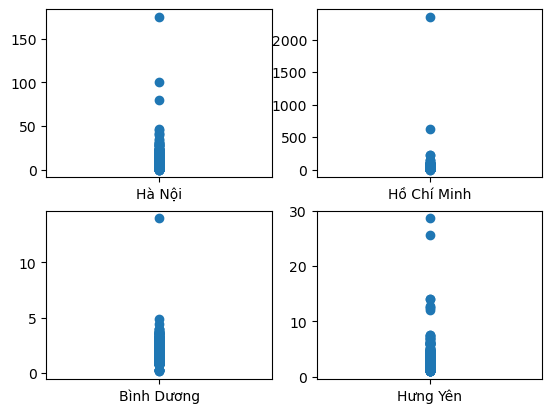

In [50]:
# Vẽ 4 biểu đồ scatter plot thể hiện giá nhà qua 4 thành phố có số lượng nhà nhiều nhất
fig , ax = plt.subplots(2,2)
ax[0,0].scatter(arr_HN , arr_price_HN)
ax[0,1].scatter(arr_TPHCM , arr_price_TPHCM)
ax[1,0].scatter(arr_BD , arr_price_BD)
ax[1,1].scatter(arr_HY , arr_price_HY)
plt.show();

In [51]:
TPHCM_House["Price"].max()

2350.0

In [52]:
df_HousingPrice[df_HousingPrice["Price"] == 2350]

,Area,Price,Bedrooms,Bathrooms,District,City
618,75.0,2350.0,2,2.0,Nhà Bè,Hồ Chí Minh


In [53]:
arr_price_TPHCM[::-1].sort()
arr_price_TPHCM

array([2.35e+03, 6.25e+02, 2.30e+02, ..., 7.00e-01, 6.50e-01, 1.40e-02])

In [54]:
arr_price_TPHCM[1]

625.0

In [55]:
df_HousingPrice[df_HousingPrice["Price"] == 625]

,Area,Price,Bedrooms,Bathrooms,District,City
1408,25.0,625.0,1,1.0,Quận 2,Hồ Chí Minh


In [56]:
arr_price_TPHCM[2]

230.0

In [57]:
df_HousingPrice[df_HousingPrice["Price"] == 230]

,Area,Price,Bedrooms,Bathrooms,District,City
4398,400.0,230.0,4,2.0,Quận 2,Hồ Chí Minh
4399,400.0,230.0,4,3.0,Quận 2,Hồ Chí Minh


In [58]:
arr_price_TPHCM[4]

150.0

In [59]:
df_HousingPrice[df_HousingPrice["Price"] == 150]

,Area,Price,Bedrooms,Bathrooms,District,City
2398,264.0,150.0,5,2.0,Quận 2,Hồ Chí Minh
2400,264.0,150.0,5,4.0,Quận 2,Hồ Chí Minh


In [60]:
df_HousingPrice["District"].value_counts()

Nam Từ Liêm              1878
Quận 7                   1393
Quận 2                   1339
Cầu Giấy                 1133
Hà Đông                  1052
                         ... 
Ninh Kiều                   1
Quốc Oai                    1
Rạch Giá                    1
Bắc Giang                   1
Phan Rang - Tháp Chàm       1
Name: District, Length: 94, dtype: int64

In [61]:
Hn_house.head(10)

,Area,Price,Bedrooms,Bathrooms,District,City
3,70.0,2.30,3,2.0,Hà Đông,Hà Nội
12,116.0,5.40,4,2.0,Nam Từ Liêm,Hà Nội
14,109.0,3.12,3,1.0,Cầu Giấy,Hà Nội
15,78.0,1.70,2,2.0,Hà Đông,Hà Nội
18,108.0,3.70,3,2.0,Hai Bà Trưng,Hà Nội
91,118.0,3.30,3,1.0,Nam Từ Liêm,Hà Nội
93,79.0,3.40,3,2.0,Nam Từ Liêm,Hà Nội
94,100.0,3.90,3,2.0,Tây Hồ,Hà Nội
100,48.0,1.10,2,1.0,Thanh Xuân,Hà Nội
101,74.0,3.00,2,2.0,Bắc Từ Liêm,Hà Nội


In [62]:
# Distribution of apartments in Ha Noi's districts
dict_district_HN = Hn_house["District"].value_counts().to_dict()
dict_district_TPHCM = TPHCM_House["District"].value_counts().to_dict()
dict_district_BD = BinhDuong_House["District"].value_counts().to_dict()

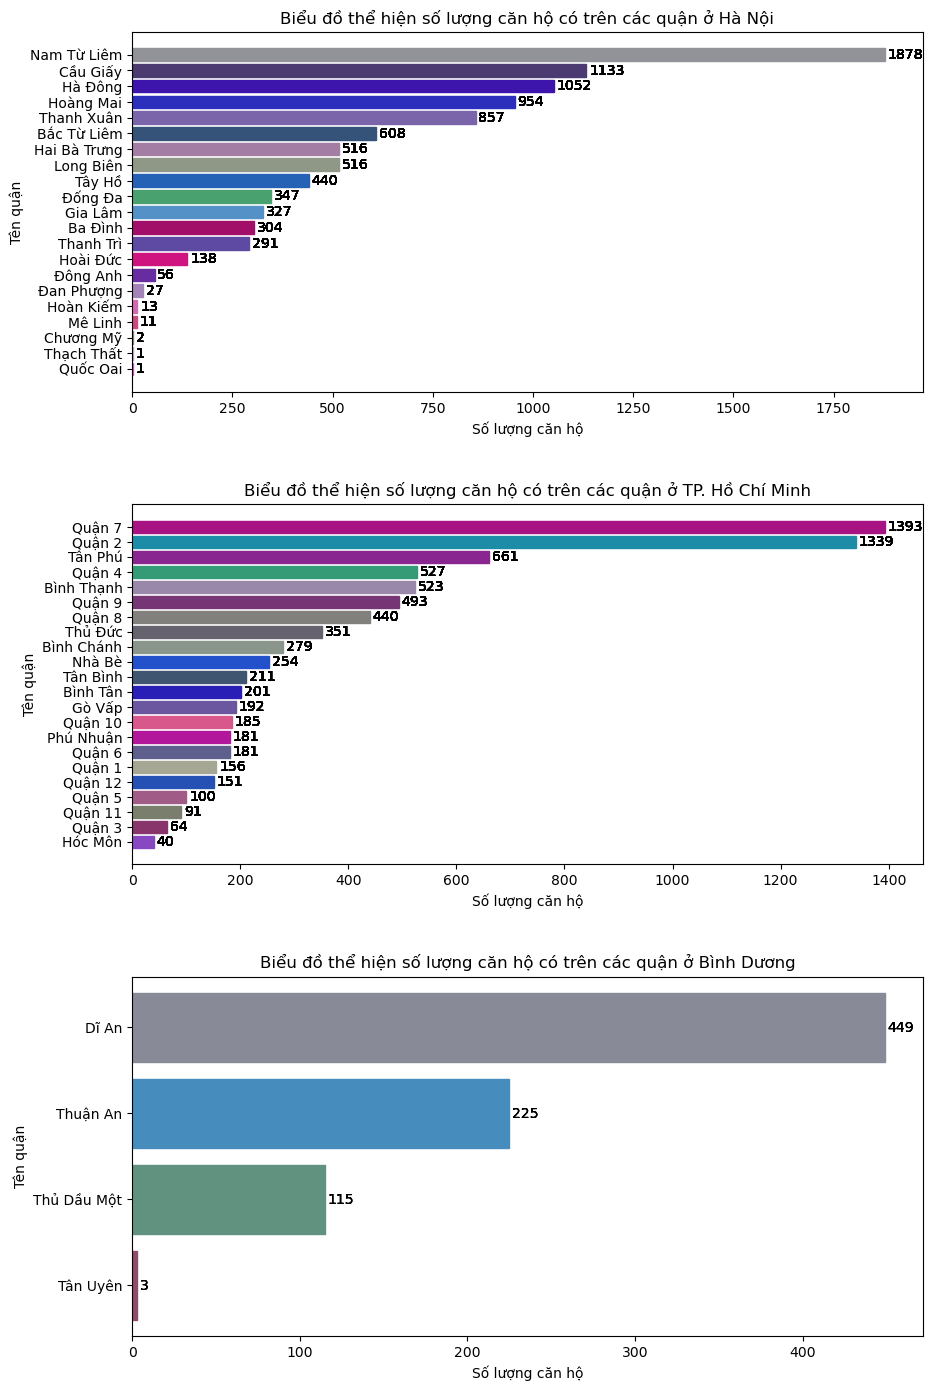

In [63]:
import random as rd
fig, axs = plt.subplots(3,1,figsize=(10, 15))
fig.tight_layout(pad=6)
                        
sorted_dict_district_HN = dict(sorted(dict_district_HN.items() , key = lambda item : item[1] , reverse=False))
sorted_dict_district_TPHCM = dict(sorted(dict_district_TPHCM.items() , key = lambda item : item[1] , reverse=False))
sorted_dict_district_BD = dict(sorted(dict_district_BD.items() , key = lambda item : item[1] , reverse=False))

ele_HN = axs[0].barh(list(sorted_dict_district_HN.keys()), list(sorted_dict_district_HN.values()))
ele_TPHCM = axs[1].barh(list(sorted_dict_district_TPHCM.keys()), list(sorted_dict_district_TPHCM.values()))
ele_BD = axs[2].barh(list(sorted_dict_district_BD.keys()), list(sorted_dict_district_BD.values()))
                        
for i in range(len(sorted_dict_district_HN)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_HN[i].set_color((r,g,b))
    axs[0].bar_label(axs[0].containers[0] , label_type = 'edge' , padding = 2)

for i in range(len(sorted_dict_district_TPHCM)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_TPHCM[i].set_color((r,g,b))
    axs[1].bar_label(axs[1].containers[0] , label_type = 'edge' , padding = 2)

for i in range(len(sorted_dict_district_BD)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.05 , 0.7)
    b = rd.uniform(0.4 , 0.8)
    ele_BD[i].set_color((r,g,b))
    axs[2].bar_label(axs[2].containers[0] , label_type = 'edge' , padding = 2)
                        

                        
# Hà Nội
axs[0].set_xlabel("Số lượng căn hộ")  
axs[0].set_ylabel("Tên quận")
axs[0].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở Hà Nội")
# TP. Hồ Chính Minh
axs[1].set_xlabel("Số lượng căn hộ")  
axs[1].set_ylabel("Tên quận")
axs[1].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở TP. Hồ Chí Minh")
# TP. Bình DƯơng
axs[2].set_xlabel("Số lượng căn hộ")  
axs[2].set_ylabel("Tên quận")
axs[2].set_title("Biểu đồ thể hiện số lượng căn hộ có trên các quận ở Bình Dương")

plt.show();

# Delete useless data

In [64]:
df_HousingPrice = df_HousingPrice.drop([618,1408],axis=0)

In [65]:
arr_price_TPHCM = np.delete(arr_price_TPHCM , [0,1])

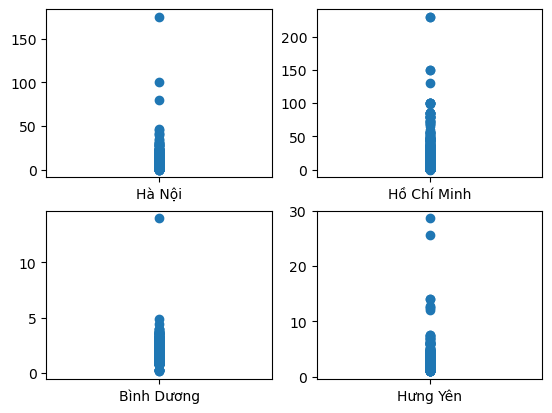

In [66]:
# Phân bố giá nhà ở 4 thành phố sau khi đã loại bỏ dữ liệu ảo
fig , ax = plt.subplots(2,2)
ax[0,0].scatter(arr_HN , arr_price_HN)
ax[0,1].scatter(arr_TPHCM[2:] , arr_price_TPHCM)
ax[1,0].scatter(arr_BD , arr_price_BD)
ax[1,1].scatter(arr_HY , arr_price_HY)
plt.show();

In [67]:
# Biểu đồ phân bố giá nhà
df_HousingPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19776 entries, 0 to 19778
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       19776 non-null  float64
 1   Price      19776 non-null  float64
 2   Bedrooms   19776 non-null  int64  
 3   Bathrooms  19776 non-null  float64
 4   District   19776 non-null  object 
 5   City       19776 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [68]:
arr_city = df_HousingPrice["City"].unique()
df_HousingPrice["City"].unique()

array(['Hồ Chí Minh', 'Hà Nội', 'Bình Dương', 'Đà Nẵng', 'Bắc Ninh',
       'Khánh Hòa', 'Hưng Yên', 'Bà Rịa Vũng Tàu', 'Bắc Giang', 'Long An',
       'Bình Định', 'Quảng Ninh', 'Hải Phòng', 'Thái Bình', 'Nghệ An',
       'Kiên Giang', 'Đồng Nai', 'Bình Thuận', 'Thanh Hóa', 'Vĩnh Phúc',
       'Bến Tre', 'Thái Nguyên', 'Tây Ninh', 'Lâm Đồng', 'Cần Thơ',
       'Hải Dương', 'Hà Tĩnh', 'Thừa Thiên Huế', 'Ninh Thuận'],
      dtype=object)

In [69]:
arr_city[0]

'Hồ Chí Minh'

In [70]:
arr_cities = []
arr_price_citiesHouse = []
for i in range(0,len(arr_city)):
    # Save the city information in the array
    arr_cities.append(arr_city[i])
    # get the house price of each city
    df_temp = df_HousingPrice[df_HousingPrice["City"] == arr_city[i]]
    arr_tempPirce = df_temp["Price"].tolist()
    # Save the house price of each city
    arr_price_citiesHouse.append(arr_tempPirce)

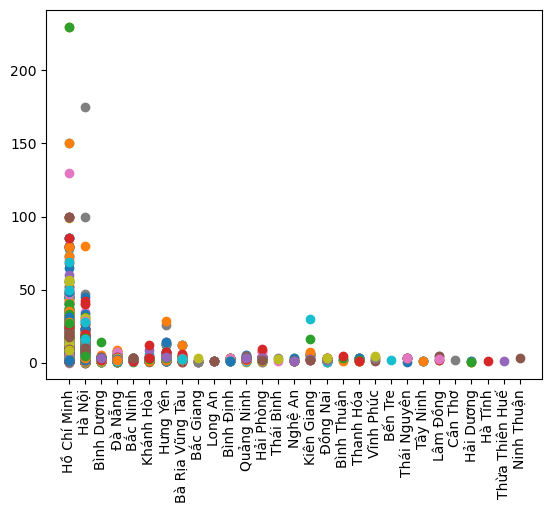

In [71]:
for i in range(len(arr_cities)):
    for j in range(len(arr_price_citiesHouse[i])):
        plt.scatter(arr_cities[i], arr_price_citiesHouse[i][j])
plt.xticks(rotation=90)
plt.show();

In [72]:
# Number of houses in cities
num_house = df_HousingPrice["City"].value_counts()
dict_house = num_house.to_dict()

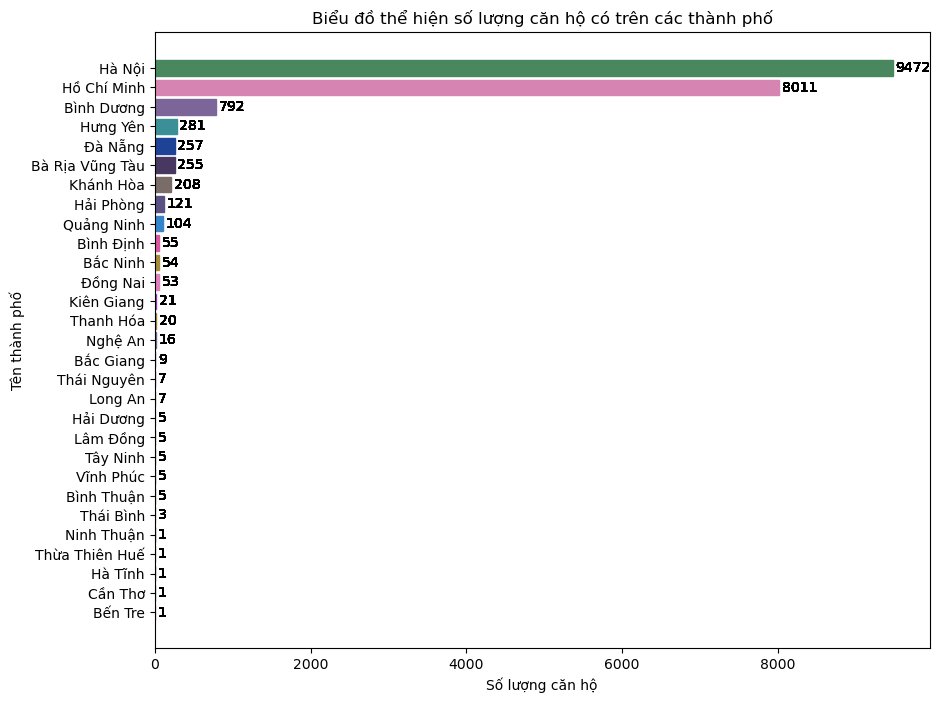

In [73]:
import random as rd
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
sorted_dict = dict(sorted(dict_house.items() , key = lambda item : item[1] , reverse=False))
ele = ax.barh(list(sorted_dict.keys()), list(sorted_dict.values()))
for i in range(len(sorted_dict)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.2 , 0.6)
    b = rd.uniform(0.2 , 0.8)
    ele[i].set_color((r,g,b))
    ax.bar_label(ax.containers[0] , label_type = 'edge' , padding = 2)
ax.set_xlabel("Số lượng căn hộ")  
ax.set_ylabel("Tên thành phố")
ax.set_title("Biểu đồ thể hiện số lượng căn hộ có trên các thành phố")
plt.show();

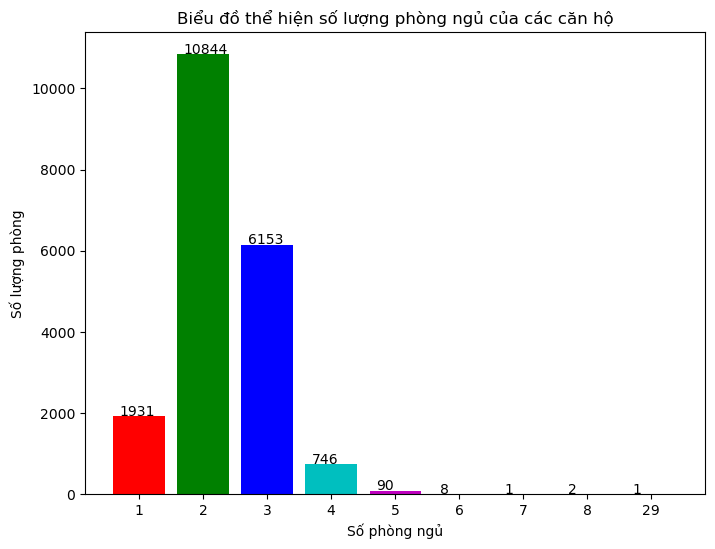

In [74]:
# Distribution of the number of bedrooms
dict_bedrooms = df_HousingPrice["Bedrooms"].value_counts().to_dict()
sorted_dict = {}
for key in sorted(dict_bedrooms.keys()):
    sorted_dict[str(key)] = dict_bedrooms[key]
fig = plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(sorted_dict.keys() , sorted_dict.values() , color = colors)
for i, v in enumerate(sorted_dict.values()):
    plt.text(i - 0.3, v + 10, str(v))
plt.xlabel("Số phòng ngủ")
plt.ylabel("Số lượng phòng")
plt.title("Biểu đồ thể hiện số lượng phòng ngủ của các căn hộ")
plt.show();

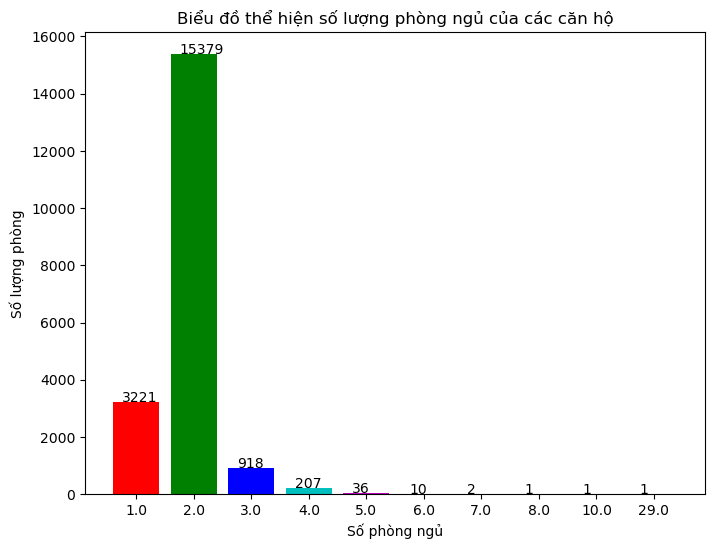

In [75]:
# Distribution of the number of bathrooms
dict_bathrooms = df_HousingPrice["Bathrooms"].value_counts().to_dict()
sorted_dict_bath = {}
for key in sorted(dict_bathrooms.keys()):
    sorted_dict_bath[str(key)] = dict_bathrooms[key]
fig = plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(sorted_dict_bath.keys() , sorted_dict_bath.values() , color = colors , width = 0.8)
for i, v in enumerate(sorted_dict_bath.values()):
    plt.text(i - 0.25, v + 10, str(v))
plt.xlabel("Số phòng ngủ")
plt.ylabel("Số lượng phòng")
plt.title("Biểu đồ thể hiện số lượng phòng ngủ của các căn hộ")
plt.show();

In [76]:
# Change the order of columns in DataFrame
new_col = df_HousingPrice.pop('Price')
df_HousingPrice.insert(5 , 'Price' , new_col)
df_HousingPrice.tail(10)

,Area,Bedrooms,Bathrooms,District,City,Price
19769,93.2,2,2.0,Hà Đông,Hà Nội,2.10
19770,120.0,3,2.0,Ba Đình,Hà Nội,3.12
19771,84.0,2,2.0,Quận 4,Hồ Chí Minh,5.60
19772,110.0,3,2.0,Bắc Từ Liêm,Hà Nội,4.30
19773,93.0,2,2.0,Quận 2,Hồ Chí Minh,9.20
19774,80.0,2,2.0,Quận 2,Hồ Chí Minh,4.50
19775,97.0,2,2.0,Quận 6,Hồ Chí Minh,3.30
19776,117.0,3,2.0,Bình Thạnh,Hồ Chí Minh,8.30
19777,534.0,4,2.0,Quận 7,Hồ Chí Minh,49.90
19778,62.0,2,3.0,Quận 8,Hồ Chí Minh,1.71


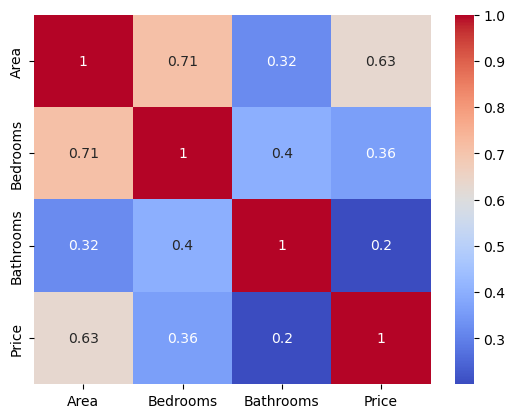

In [77]:
# correlation matrix
corr_matrix = df_HousingPrice.corr()
sns.heatmap(corr_matrix , cmap = 'coolwarm' , annot = True)
plt.show();

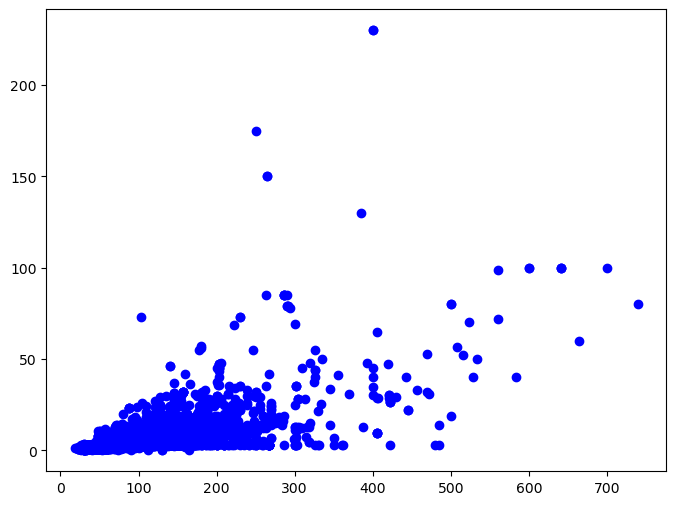

In [78]:
# scatter plot Price Area
arr_price = df_HousingPrice["Price"].to_list()
arr_area = df_HousingPrice["Area"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_area , arr_price , c = "blue")
plt.show();

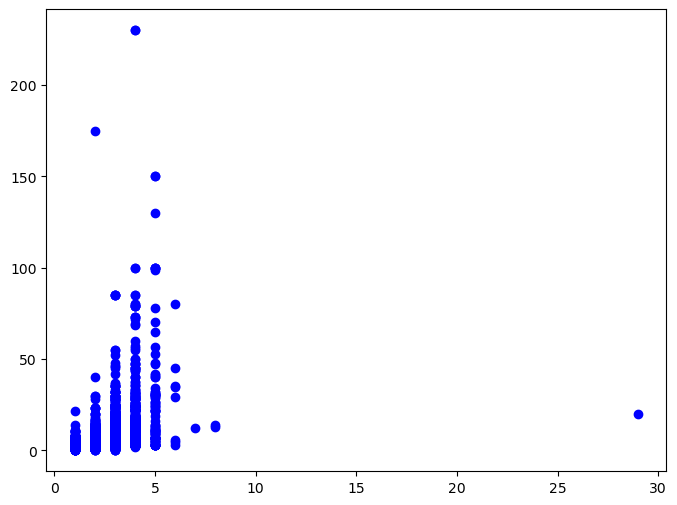

In [79]:
# scatter plot Price Bedrooms
arr_bedrooms = df_HousingPrice["Bedrooms"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_bedrooms , arr_price , c = "blue")
plt.show();

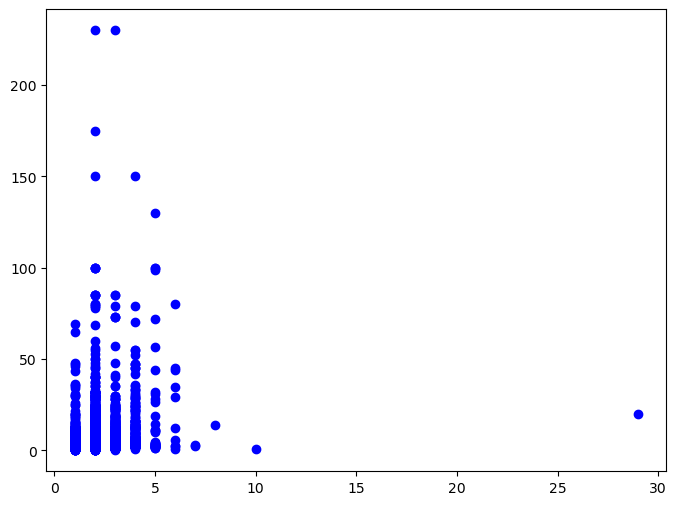

In [80]:
# scatter plot Price Bathrooms
arr_bathrooms = df_HousingPrice["Bathrooms"].to_list()
fig = plt.figure(figsize=(8,6))
plt.scatter(arr_bathrooms , arr_price , c = "blue")
plt.show();

# Train Model

In [81]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [82]:
x = df_HousingPrice.drop('Price' , axis=1)
y = df_HousingPrice['Price']

In [83]:
x

,Area,Bedrooms,Bathrooms,District,City
0,121.0,3,2.0,Bình Thạnh,Hồ Chí Minh
1,53.0,1,1.0,Quận 7,Hồ Chí Minh
2,53.0,1,1.0,Quận 7,Hồ Chí Minh
3,70.0,3,2.0,Hà Đông,Hà Nội
4,67.0,2,2.0,Quận 7,Hồ Chí Minh
...,...,...,...,...,...
19774,80.0,2,2.0,Quận 2,Hồ Chí Minh
19775,97.0,2,2.0,Quận 6,Hồ Chí Minh
19776,117.0,3,2.0,Bình Thạnh,Hồ Chí Minh
19777,534.0,4,2.0,Quận 7,Hồ Chí Minh


In [84]:
y

0         8.10
1         1.95
2         1.70
3         2.30
4         2.40
         ...  
19774     4.50
19775     3.30
19776     8.30
19777    49.90
19778     1.71
Name: Price, Length: 19776, dtype: float64

In [85]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [86]:
x_train.shape

(15820, 5)

In [87]:
y_train.shape

(15820,)

In [88]:
x_test.shape

(3956, 5)

In [89]:
y_test.shape

(3956,)

# Transform Data

In [90]:
# Nominal features
nom_transformer = Pipeline(steps=[
	("encoder", OneHotEncoder(handle_unknown='ignore'))
])

In [91]:
# number featues
num_features = Pipeline(steps=[
	("scaler", MinMaxScaler())
])

In [92]:
# Preprocesor
preprocessor = ColumnTransformer(transformers=[
    ("nominal_featues" , nom_transformer , ["District", "City"]),
    ("number_featues" , num_features , ["Area", "Bedrooms", "Bathrooms"])
])

In [93]:
# Model
reg = Pipeline(steps=[
    ("preprocessing_data" , preprocessor),
    ("regressor" , RandomForestRegressor(n_estimators=100 , max_depth=20))
])

# Train Model

In [94]:
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
df_result = pd.DataFrame({'Price_Original': y_test , 'Price_Predict': y_predict})
df_result.head(10)

,Price_Original,Price_Predict
13370,0.82,1.780899
439,1.53,1.696378
8853,2.90,2.714260
2273,7.75,7.212916
3408,1.45,2.182459
18537,4.05,1.819795
11186,1.42,2.238952
15042,5.80,4.576819
8094,6.00,4.070621
10194,4.25,5.158062


In [95]:
print(df_HousingPrice[df_HousingPrice["Price"] == 2.9])

        Area  Bedrooms  Bathrooms     District         City  Price
37     100.0         3        3.0       Quận 4  Hồ Chí Minh    2.9
215     59.0         2        2.0  Nam Từ Liêm       Hà Nội    2.9
238     54.0         2        2.0  Nam Từ Liêm       Hà Nội    2.9
335     71.0         2        2.0       Nhà Bè  Hồ Chí Minh    2.9
477     26.0         2        2.0   Bình Chánh  Hồ Chí Minh    2.9
...      ...       ...        ...          ...          ...    ...
19193   77.0         2        2.0     Tân Bình  Hồ Chí Minh    2.9
19201   68.0         2        2.0    Hoàng Mai       Hà Nội    2.9
19225   94.0         3        2.0     Biên Hòa     Đồng Nai    2.9
19406   67.0         2        2.0    Hoàng Mai       Hà Nội    2.9
19726   72.0         2        2.0  Bắc Từ Liêm       Hà Nội    2.9

[238 rows x 6 columns]


# Evaluation with Mean absolute error

In [96]:
print("R2: {}".format(r2_score(y_test, y_predict)))
print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))

R2: 0.7154370592725523
MAE: 0.9711031762106408
MSE: 7.296466166743706


# Predictions with values outside the data set:
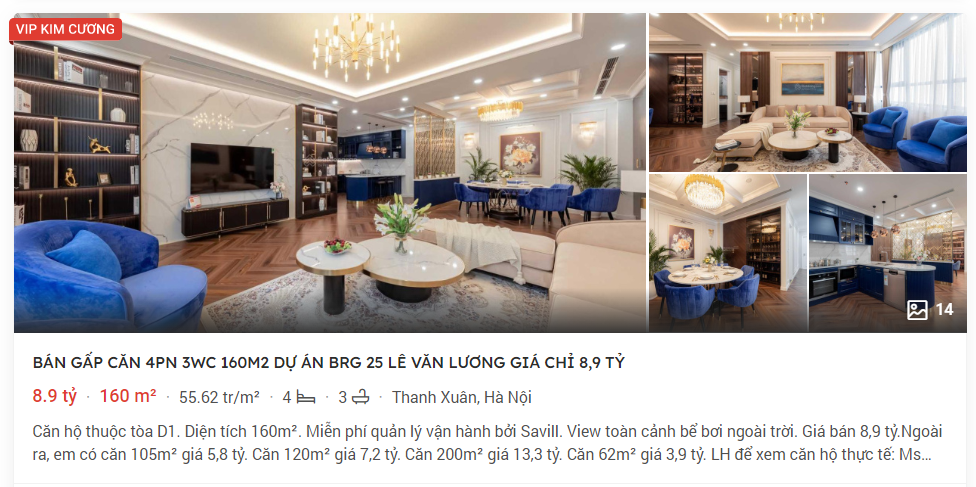

In [99]:
new_data = pd.DataFrame({'Area':[160] , 'Bedrooms':[4] , 'Bathrooms':[3] , 'District':["Thanh Xuân"] , 'City': ["Hà Nội"]})
y_pred = reg.predict(new_data)
print("Giá dự đoán: {}".format(y_pred))

Giá dự đoán: [8.39601091]


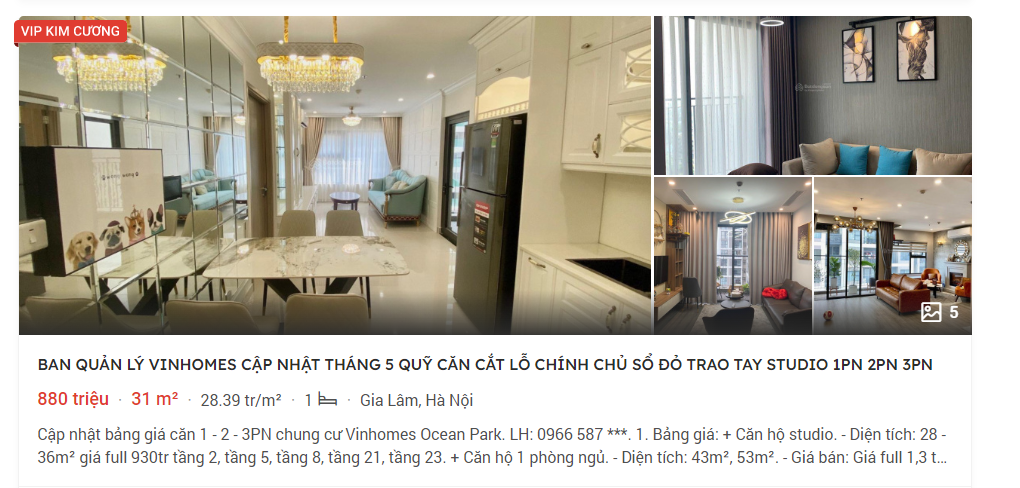

In [100]:
new_data_1 = pd.DataFrame({'Area':[247] , 'Bedrooms':[4] , 'Bathrooms':[4] , 'District':["Gia Lâm"] , 'City': ["Hà Nội"]})
y_pred_1 = reg.predict(new_data_1)
print("Giá dự đoán: {}".format(y_pred_1))

Giá dự đoán: [12.7717746]
